**• Load the CIFAR 10 dataset.**

**• Choose first 150 images in each class and create a MINI CIFAR 10**

**• Split the MINI CIFAR-10 dataset into train (60%), valid (20%) and test (20%) sets with equal class distribution**

In [ ]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select first 150 images in each class
X_train = X_train[:150 * 10]
y_train = y_train[:150 * 10]

# Split into train, valid and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

# Print the number of images in each set
print(f"Train: {X_train.shape[0]}, Valid: {X_valid.shape[0]}, Test: {X_test.shape[0]}")


170498071/170498071 [==============================] - 2s 0us/step
Train: 1200, Valid: 150, Test: 150


# **Question 1**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def AlexNet(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    # Layer 1
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), padding='same', input_shape=input_shape))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())

    # Layer 2
    model.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())

    # Layer 3
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())

    # Layer 4
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())

    # Layer 5
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())

    # Flatten the output before the fully connected layers
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, input_shape=(input_shape[0]*input_shape[1]*input_shape[2],)))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(4096))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes))
    model.add(layers.Activation('softmax'))

    return model

# Instantiate the model
model = AlexNet(input_shape=(32, 32, 3), num_classes=10)

# Print model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 96)        2688      
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 96)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 16, 16, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 16, 16, 256)      

Epoch 1/30
38/38 [==============================] - 81s 2s/step - loss: 2.7726 - accuracy: 0.1917 - val_loss: 3.6159 - val_accuracy: 0.1133
Epoch 2/30
38/38 [==============================] - 78s 2s/step - loss: 2.1645 - accuracy: 0.3033 - val_loss: 3.4341 - val_accuracy: 0.1000
Epoch 3/30
38/38 [==============================] - 79s 2s/step - loss: 1.8986 - accuracy: 0.3508 - val_loss: 2.3386 - val_accuracy: 0.2467
Epoch 4/30
38/38 [==============================] - 79s 2s/step - loss: 1.6778 - accuracy: 0.4325 - val_loss: 2.0122 - val_accuracy: 0.3000
Epoch 5/30
38/38 [==============================] - 75s 2s/step - loss: 1.4815 - accuracy: 0.4975 - val_loss: 1.7930 - val_accuracy: 0.4067
Epoch 6/30
38/38 [==============================] - 77s 2s/step - loss: 1.3207 - accuracy: 0.5367 - val_loss: 1.6999 - val_accuracy: 0.3733
Epoch 7/30
38/38 [==============================] - 77s 2s/step - loss: 1.0894 - accuracy: 0.6017 - val_loss: 1.9609 - val_accuracy: 0.4133
Epoch 8/30
38/38 [==

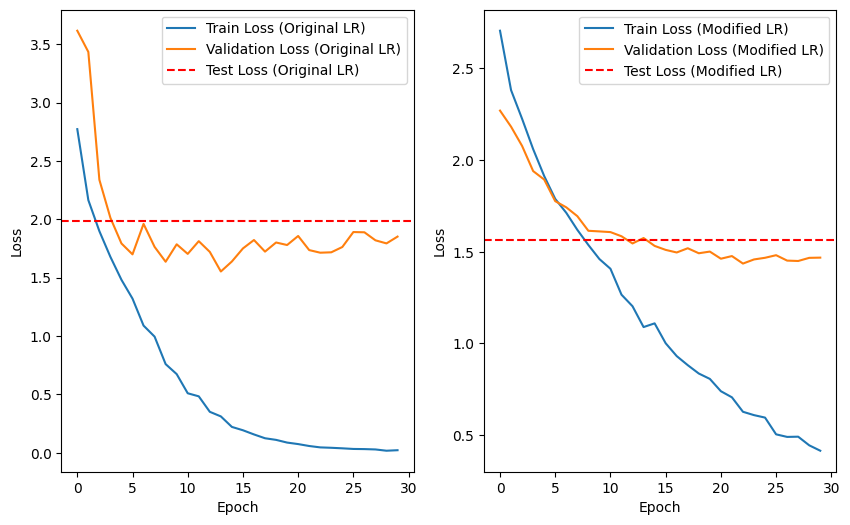

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


# Step 1: Train AlexNet with original learning rate with 30 epochs
model_1 = AlexNet()
model_1.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_1 = model_1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Step 2: Train AlexNet with modified learning rate
new_learning_rate = 0.001  # Change the learning rate here
model_2 = AlexNet()
model_2.compile(optimizer=keras.optimizers.SGD(learning_rate=new_learning_rate), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_2 = model_2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Extract loss values from history
loss_1 = history_1.history["loss"]
val_loss_1 = history_1.history["val_loss"]
test_loss_1 = model_1.evaluate(X_test, y_test, verbose=0)[0]

loss_2 = history_2.history["loss"]
val_loss_2 = history_2.history["val_loss"]
test_loss_2 = model_2.evaluate(X_test, y_test, verbose=0)[0]

# Plot the losses
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_1, label="Train Loss (Original LR)")
plt.plot(val_loss_1, label="Validation Loss (Original LR)")
plt.axhline(test_loss_1, color='r', linestyle='--', label="Test Loss (Original LR)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_2, label="Train Loss (Modified LR)")
plt.plot(val_loss_2, label="Validation Loss (Modified LR)")
plt.axhline(test_loss_2, color='r', linestyle='--', label="Test Loss (Modified LR)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


# **Question 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select first 150 images in each class
X_train = X_train[:150 * 10]
y_train = y_train[:150 * 10]

# Split into train, valid and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def VGG16():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    plt.show()

Epoch 1/30
19/19 [==============================] - 19s 914ms/step - loss: 17.0777 - accuracy: 0.1317 - val_loss: 2.2435 - val_accuracy: 0.2000
Epoch 2/30
19/19 [==============================] - 18s 948ms/step - loss: 2.0518 - accuracy: 0.2308 - val_loss: 1.8960 - val_accuracy: 0.3200
Epoch 3/30
19/19 [==============================] - 17s 897ms/step - loss: 1.8218 - accuracy: 0.3375 - val_loss: 1.7550 - val_accuracy: 0.3533
Epoch 4/30
19/19 [==============================] - 18s 938ms/step - loss: 1.6639 - accuracy: 0.3850 - val_loss: 1.7108 - val_accuracy: 0.3667
Epoch 5/30
19/19 [==============================] - 20s 1s/step - loss: 1.5332 - accuracy: 0.4317 - val_loss: 1.7139 - val_accuracy: 0.3933
Epoch 6/30
19/19 [==============================] - 28s 2s/step - loss: 1.3824 - accuracy: 0.4808 - val_loss: 1.6381 - val_accuracy: 0.3733
Epoch 7/30
19/19 [==============================] - 17s 890ms/step - loss: 1.3174 - accuracy: 0.5217 - val_loss: 1.6403 - val_accuracy: 0.3600
Epoc

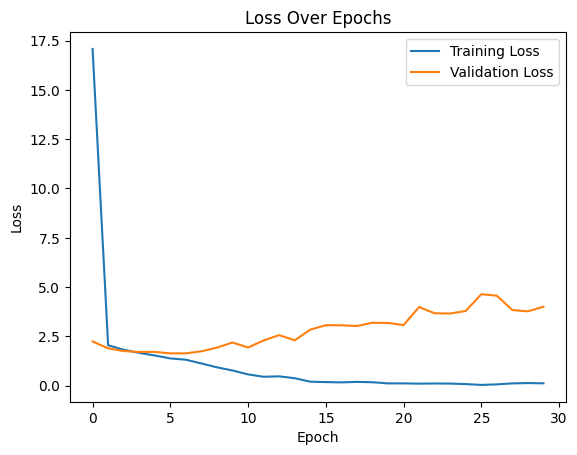

In [ ]:
# Step 1: Train with original settings
model_3 = VGG16()
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_step1 = model_3.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)

# Evaluate on test set
test_loss_step1, test_acc_step1 = model_3.evaluate(X_test, y_test)
print(f'Test Loss (Step 1): {test_loss_step1}, Test Accuracy (Step 1): {test_acc_step1}')

# Plot loss for step 1
plot_loss(history_step1)

Epoch 1/30
19/19 [==============================] - 18s 892ms/step - loss: 9.7809 - accuracy: 0.0942 - val_loss: 7.7101 - val_accuracy: 0.0667
Epoch 2/30
19/19 [==============================] - 18s 937ms/step - loss: 7.6466 - accuracy: 0.0992 - val_loss: 5.3407 - val_accuracy: 0.1133
Epoch 3/30
19/19 [==============================] - 18s 958ms/step - loss: 5.7808 - accuracy: 0.1367 - val_loss: 4.0757 - val_accuracy: 0.1533
Epoch 4/30
19/19 [==============================] - 18s 948ms/step - loss: 4.8720 - accuracy: 0.1433 - val_loss: 2.8997 - val_accuracy: 0.1333
Epoch 5/30
19/19 [==============================] - 18s 947ms/step - loss: 4.1736 - accuracy: 0.1617 - val_loss: 2.6572 - val_accuracy: 0.2067
Epoch 6/30
19/19 [==============================] - 18s 962ms/step - loss: 4.0388 - accuracy: 0.1725 - val_loss: 2.5198 - val_accuracy: 0.2400
Epoch 7/30
19/19 [==============================] - 17s 899ms/step - loss: 3.6949 - accuracy: 0.1650 - val_loss: 2.4358 - val_accuracy: 0.2333

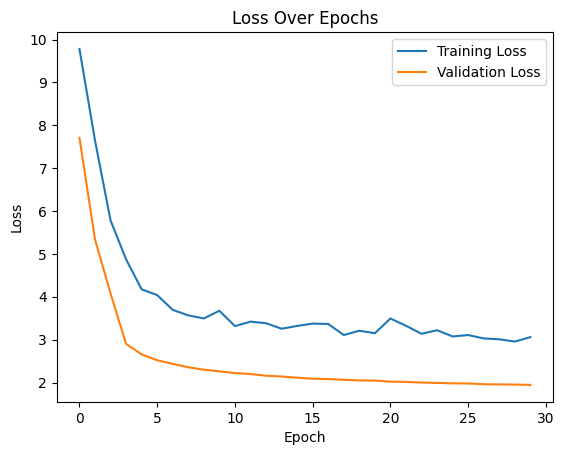

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Step 2: Train with increased learning rate and dropout layer
model_2 = VGG16()
optimizer = Adam(learning_rate=0.000001)  # Increased learning rate
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_2.add(Dropout(0.1))  # Adding dropout layer
# Train the model
history_step2 = model_2.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_valid, y_valid))

# Evaluate on test set
test_loss_step2, test_acc_step2 = model_2.evaluate(X_test, y_test)
print(f'Test Loss (Step 2): {test_loss_step2}, Test Accuracy (Step 2): {test_acc_step2}')

# Plot loss for step 2
plot_loss(history_step2)


# **Question 3**

Train: 1200, Valid: 150, Test: 150
Epoch 1/30
38/38 [==============================] - 12s 205ms/step - loss: 3.2748 - accuracy: 0.1358 - val_loss: 3.3238 - val_accuracy: 0.1533
Epoch 2/30
38/38 [==============================] - 6s 147ms/step - loss: 2.7265 - accuracy: 0.1842 - val_loss: 2.8409 - val_accuracy: 0.1733
Epoch 3/30
38/38 [==============================] - 7s 177ms/step - loss: 2.5674 - accuracy: 0.2083 - val_loss: 2.3840 - val_accuracy: 0.1800
Epoch 4/30
38/38 [==============================] - 6s 147ms/step - loss: 2.4063 - accuracy: 0.2325 - val_loss: 2.2675 - val_accuracy: 0.1867
Epoch 5/30
38/38 [==============================] - 6s 171ms/step - loss: 2.3171 - accuracy: 0.2467 - val_loss: 2.0532 - val_accuracy: 0.2933
Epoch 6/30
38/38 [==============================] - 6s 151ms/step - loss: 2.2342 - accuracy: 0.2667 - val_loss: 2.0131 - val_accuracy: 0.3067
Epoch 7/30
38/38 [==============================] - 6s 169ms/step - loss: 2.1935 - accuracy: 0.2625 - val_loss: 

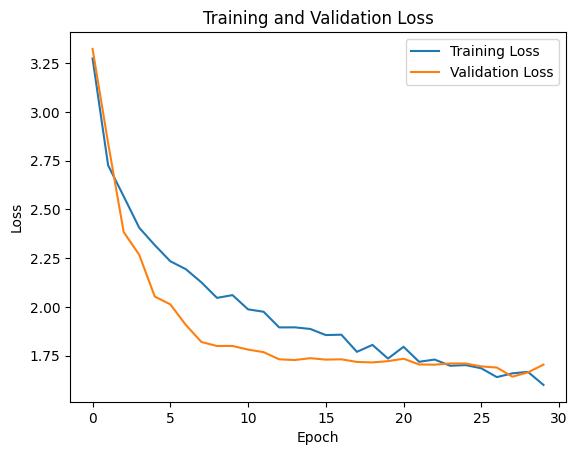

Test Loss: 1.7689
Test Accuracy: 0.3933


In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select first 150 images in each class
X_train = X_train[:150 * 10]
y_train = y_train[:150 * 10]

# Split into train, valid and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

# Print the number of images in each set
print(f"Train: {X_train.shape[0]}, Valid: {X_valid.shape[0]}, Test: {X_test.shape[0]}")

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Load pre-trained RESNET50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Combine base model with custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


# **Question 4**

Train: 1200, Valid: 150, Test: 150
Epoch 1/30
38/38 [==============================] - 59s 629ms/step - loss: 2.3467 - accuracy: 0.3158 - val_loss: 84.9346 - val_accuracy: 0.1067
Epoch 2/30
38/38 [==============================] - 22s 579ms/step - loss: 1.6869 - accuracy: 0.4692 - val_loss: 9.4166 - val_accuracy: 0.2067
Epoch 3/30
38/38 [==============================] - 22s 581ms/step - loss: 1.2309 - accuracy: 0.6008 - val_loss: 17.9761 - val_accuracy: 0.2600
Epoch 4/30
38/38 [==============================] - 21s 542ms/step - loss: 1.0605 - accuracy: 0.6842 - val_loss: 2.2328 - val_accuracy: 0.4133
Epoch 5/30
38/38 [==============================] - 21s 566ms/step - loss: 0.8452 - accuracy: 0.7492 - val_loss: 12.2912 - val_accuracy: 0.3133
Epoch 6/30
38/38 [==============================] - 21s 566ms/step - loss: 0.6944 - accuracy: 0.7792 - val_loss: 2.6600 - val_accuracy: 0.4800
Epoch 7/30
38/38 [==============================] - 20s 539ms/step - loss: 0.7325 - accuracy: 0.7617 - v

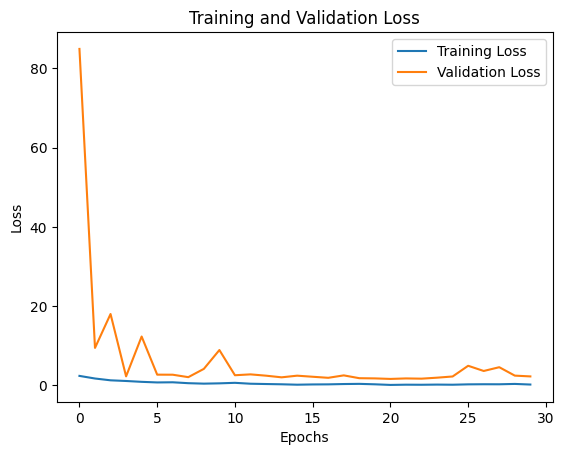

5/5 [==============================] - 1s 107ms/step - loss: 2.4562 - accuracy: 0.5200
Test Loss: 2.45622181892395, Test Accuracy: 0.5199999809265137


In [ ]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import DenseNet121
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select first 150 images in each class
X_train = X_train[:150 * 10]
y_train = y_train[:150 * 10]

# Split into train, valid and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

# Print the number of images in each set
print(f"Train: {X_train.shape[0]}, Valid: {X_valid.shape[0]}, Test: {X_test.shape[0]}")

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

# Plot training loss, validation loss, and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


# **Question 5**

Epoch 1/50
19/19 [==============================] - 7s 287ms/step - loss: 2.7097 - accuracy: 0.2542 - val_loss: 11.2549 - val_accuracy: 0.1800
Epoch 2/50
19/19 [==============================] - 5s 242ms/step - loss: 2.1492 - accuracy: 0.3317 - val_loss: 7.5461 - val_accuracy: 0.1667
Epoch 3/50
19/19 [==============================] - 6s 295ms/step - loss: 1.9403 - accuracy: 0.3700 - val_loss: 4.2710 - val_accuracy: 0.2333
Epoch 4/50
19/19 [==============================] - 6s 292ms/step - loss: 1.7903 - accuracy: 0.4092 - val_loss: 3.3266 - val_accuracy: 0.2200
Epoch 5/50
19/19 [==============================] - 5s 261ms/step - loss: 1.6933 - accuracy: 0.4267 - val_loss: 2.2792 - val_accuracy: 0.3467
Epoch 6/50
19/19 [==============================] - 6s 316ms/step - loss: 1.6090 - accuracy: 0.4525 - val_loss: 2.3709 - val_accuracy: 0.3133
Epoch 7/50
19/19 [==============================] - 6s 317ms/step - loss: 1.6168 - accuracy: 0.4483 - val_loss: 2.0119 - val_accuracy: 0.4133
Epoch

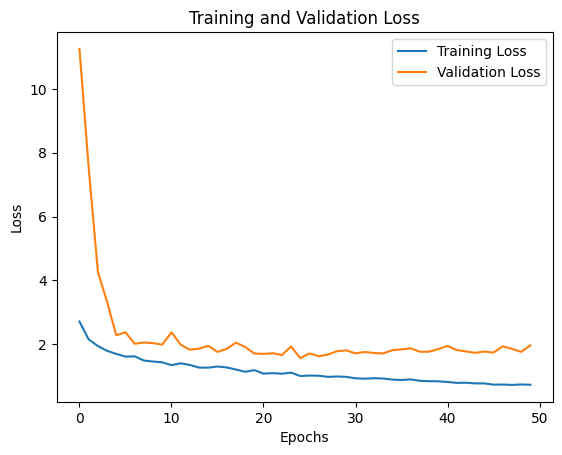

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Step 1: Preprocess the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select first 150 images in each class
X_train = X_train[:150 * 10]
y_train = y_train[:150 * 10]

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split into train, valid and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

# Define the ColorSplashNet model
my_model = Sequential(name="ColorSplashNet")

# Add convolutional layers
my_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
my_model.add(BatchNormalization())
my_model.add(Conv2D(64, (3, 3), activation='relu'))
my_model.add(BatchNormalization())

# Add pooling layer
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))

# Flatten the output
my_model.add(Flatten())

# Add dense layers
my_model.add(Dense(128, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.5))
my_model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
my_history = my_model.fit(datagen.flow(X_train, y_train, batch_size=64),
                           epochs=50, validation_data=(X_valid, y_valid))

# Evaluate the model
test_loss, test_accuracy = my_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training loss and validation loss
plt.plot(my_history.history['loss'], label='Training Loss')
plt.plot(my_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
